# Actividad 2 Curso 4: Aplicaciones en Ciencias de Datos e Inteligencia Artificial
Autores: Sebastian, Moisés Marquina y Dora Novoa

### 2.1 Solución cerrada de regresión lineal
5 ptos Abrir entorno de programación, de preferencia utilizar Visual Studio Code, Google Colaba o Jupyter
Notebook. 

5 ptos Utilizando Numpy o Scipy genere 1,000 datos que distribuyan uniforme entre 0 y 3, U(0, 3). Este
arreglo representará su variable independiente, tambión denominado a lo largo de este curso como
feature, descriptor o input.

El método de np.random.uniform esta en la documentacio de [numpay.org](https://numpy.org/doc/2.0/reference/random/generated/numpy.random.uniform.html)

5 ptos A través de la misma librería genere los 1,000 datos de la variable dependiente, también conocida
como target u output, de la siguiente forma y = 5 + 2x + U(2, 4)

5 ptos Por medio de matplotlib o seaborn genere un gráfico de dispersión (scatter plot) entre la variable
dependiente y la variable independiente. Ajuste título, nombre de ejes, tamaño de los valores en
los ejes, tamaño de la figura, colores de los y la transparencia de los puntos.

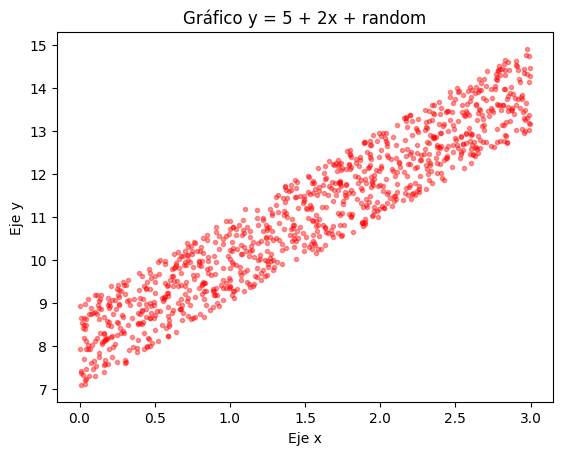

In [28]:
import numpy as np
import matplotlib.pyplot as plt

X = np.random.uniform(0,3, size=1000)
Y = 5 + 2*X + np.random.uniform(2,4,1000)

plt.plot(X, Y, '.', color='red', alpha=0.4)
plt.title("Gráfico y = 5 + 2x + random")
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.show()
  



5 ptos Genere una función que permita visualizar los datos simulados. Esta función debe recibir como
argumentos la variable dependiente y, la variable independiente x y el número de datos a simular.
La función debe permitir visualizar o guardar la imagen.

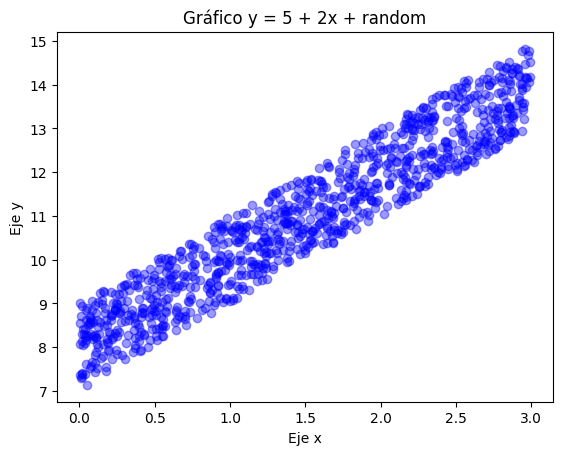

In [29]:
import numpy as np
import matplotlib.pyplot as plt
def visualizar_datos(x, y, num_datos=1000):
    x = np.random.uniform(0,3, size=num_datos)
    y = 5 + 2*x + np.random.uniform(2,4,num_datos)

    plt.scatter(x, y, color='blue', alpha=0.4)
    plt.title("Gráfico y = 5 + 2x + random")
    plt.xlabel("Eje x")
    plt.ylabel("Eje y")
    plt.show()
  
visualizar_datos(X, Y, 1000)

5 ptos Aplique las operaciones matriciales necesarias para ajustar una regresión lineal a través de su
solución cerrada (use numpy.linalg). Cree una función que reciba la variable dependiente y la
variable independiente, esta función debe retornar los parámetros optimizados.



In [30]:
import numpy as np
x = np.random.uniform(0,3, size=1000)
y = 5 + 2*X + np.random.uniform(2,4,1000)
X = x.reshape(-1, 1) # se cambia a matriz de una sola columna

def ajustar_regresion(X, y):
    X_arr = np.c_[np.ones(X.shape[0]), X] # agrega una columna de 1's a la matriz X se concatenea a la variable independiente
    # ajuste = (X^T * X)^-1 * X^T * y
    ajuste = np.linalg.inv(X_arr.T.dot(X_arr)).dot(X_arr.T).dot(y)
    return ajuste
ajuste = ajustar_regresion(X, y)
# el ajuste será los coeficientes de la ecuación de la recta  (intercepto y pendiente), así: y = ajuste[0] + ajuste[1]*x   
# print(ajuste)


5 ptos Utilizando Matplotlib o seaborn genere un gráfico que incluya la solución (recta óptima) y
los datos utilizados. Cree una función que reciba x, y y los parámetros óptimos y cree dicha
visualización.

Para la generación de la línea X usamos el np.linspace en la documentación [numpy.org ver aquí](https://numpy.org/doc/2.0/reference/generated/numpy.linspace.html#numpy-linspace)

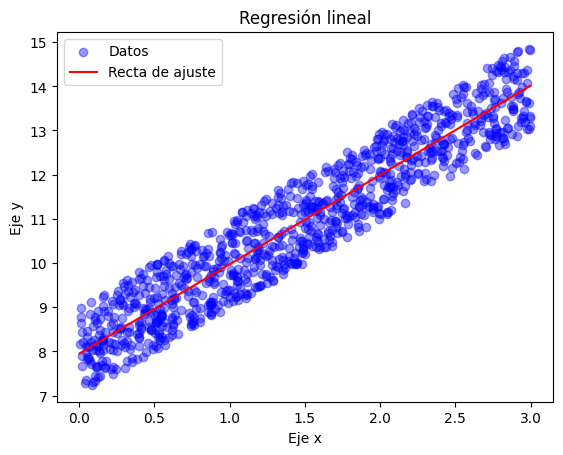

In [74]:
import numpy as np
import matplotlib.pyplot as plt

X = np.random.uniform(0,3, size=1000)
Y = 5 + 2*X + np.random.uniform(2,4,1000)

def ajustar_regresion(x, y):
    X = x.reshape(-1, 1) # se cambia a matriz de una sola columna
    X_arr = np.c_[np.ones(X.shape[0]), X] # agrega una columna de 1's a la matriz X se concatenea a la variable independiente
    # ajuste = (X^T * X)^-1 * X^T * y
    ajuste = np.linalg.inv(X_arr.T.dot(X_arr)).dot(X_arr.T).dot(y)
    return ajuste

# el ajuste será los coeficientes de la ecuación de la recta  (intercepto y pendiente), así: y = ajuste[0] + ajuste[1]*x   
ajuste = ajustar_regresion(X, Y)

def graficar_recta_ajuste(x, y, ajuste):
    # np.linspace(inicio, fin, num_puntos_generar)   genera un número entre un valor inicial y un valor final. Para esto toma el valor de el arreglo x mínimo y máximo para seguir con la recta
    x_lin = np.linspace(x.min(), x.max(), 100) # Crear valores de X para la recta de ajuste
    y_lin = ajuste[0] + ajuste[1] * x_lin  # Calcular los valores de Y para la recta de ajuste con y = mx + b
    
    plt.scatter(x, y, color='blue', alpha=0.4) # graficar los datos 
    plt.plot(x_lin, y_lin,color='red') # graficar la recta de ajuste
    
    plt.title("Regresión lineal")
    plt.xlabel("Eje x")
    plt.ylabel("Eje y")
    plt.legend(["Datos", "Recta de ajuste"])
    plt.show()

graficar_recta_ajuste(X, Y, ajuste)


5 ptos Cree una clase cuyo nombre sea regressionLineal que contenga los métodos antes generados. La
clase debe ser inicializada con los atributos: tipo de datos (simulado o real) y tamaño de la base
de datos.

Usamos el método:  np.linspace(inicio, fin, num_puntos_generar)   

genera un número especificado de valores espaciados uniformemente entre un valor inicial y un valor final. Para esto toma el valor de el arreglo x mínimo y máximo para seguir con la recta

In [54]:

class regressionLineal():
    def __init__(self, tipo_datos, cantidad, x=None, y=None):
        self.x = x
        self.y = y
        self.tipo_datos = tipo_datos
        self.cant = cantidad
    
    def generar_datos(self): # en el caso de que no se pasen los datos
        if self.tipo_datos == "simulado":
            self.x = np.random.uniform(0,3, size=self.cant)
            self.y = 5 + 2*self.x + np.random.uniform(2,4,self.cant)
        return self.x, self.y
    
    
    def visualizar_datos(self):
        plt.scatter(self.x, self.y, color='blue', alpha=0.4)
        plt.title("Gráfico regresión lineal")
        plt.xlabel("Eje x")
        plt.ylabel("Eje y")
        plt.show()
        
    def ajustar_regresion(self):
        X = self.x.reshape(-1, 1) # se cambia a matriz de una sola columna
        X_arr = np.c_[np.ones(X.shape[0]), X] # agrega una columna de 1's a la matriz X se concatenea a la variable independiente
        # ajuste = (X^T * X)^-1 * X^T * y
        ajuste = np.linalg.inv(X_arr.T.dot(X_arr)).dot(X_arr.T).dot(self.y)
        return ajuste
    
    def graficar_recta_ajuste(self):
        
        self.generar_datos()
        ajuste = self.ajustar_regresion()

        titulo =f" y = {ajuste[0].round(2)} + {ajuste[1].round(2)} * x"
        
        x_lin = np.linspace(self.x.min(), self.x.max(), 100) # Crear valores de X para la recta de ajuste
        y_lin = ajuste[0] + ajuste[1] * x_lin  # Calcular los valores de Y para la recta de ajuste con y = mx + b
        
        plt.plot(x_lin, y_lin,color='red') # graficar la recta de ajuste
        plt.scatter(self.x, self.y, color='blue', alpha=0.4) # graficar los datos 
        

        plt.title("Regresión lineal \n" + titulo)
        plt.xlabel("Eje x")
        plt.ylabel("Eje y")
        plt.show()


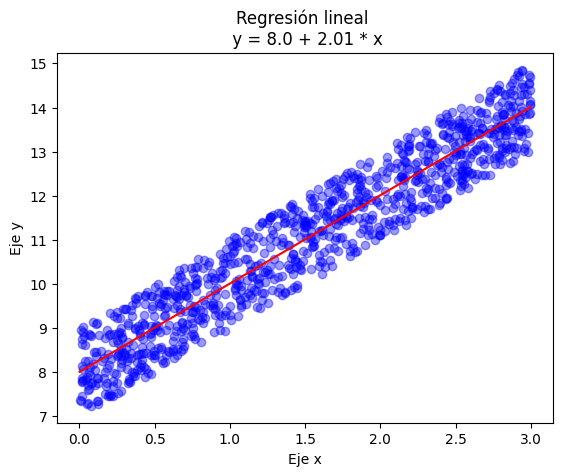

In [55]:
reglineal = regressionLineal("simulado", 1000)
reglineal.graficar_recta_ajuste()


### 2.2 Regresión Polinomial (25 puntos)

0 ptos Cargue la base de datos adjunta a la actividad (measurements.csv).

5 ptos Mediante Matplotlib o seaborn visualizar las variables contenidas en la base de datos con un
scatter plot.

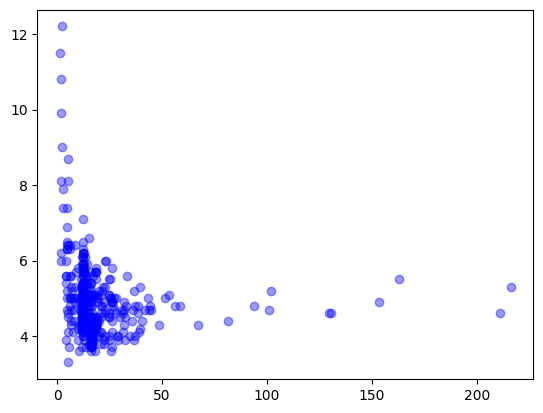

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("measurements.csv", encoding="latin-1", sep=",")

x = df["distance"].str.replace(',', '.').astype(float).values
y = df["consume"].str.replace(',', '.').astype(float).values


plt.scatter(x, y, color='blue', alpha=0.4)
plt.show()


5 ptos Use la regresión lineal previamente implementada para predecir el consumo (consume) mediante la
distancia recorrida (distance). Se recomienda usar la clase previamente implementada regressionLineal,
sin embargo, también se permite usar funciones aisladas. El uso de métodos disponibles en sklearn
también está permitido pero se evaluará con la mitad del puntaje asignado a este item.


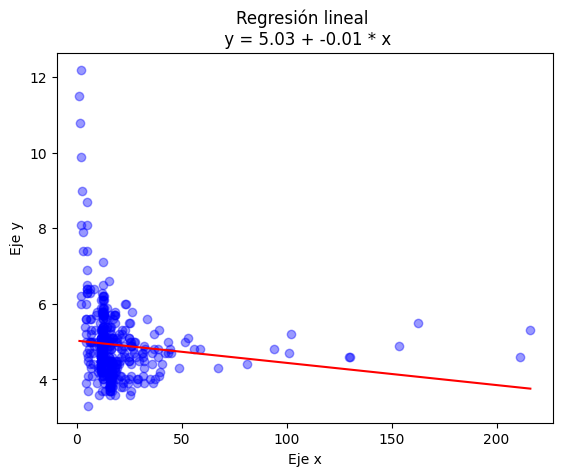

In [ ]:
tamaño = df["distance"].shape[0]

reglineal = regressionLineal("real", tamaño, x, y)
reglineal.graficar_recta_ajuste()


5 ptos Genere una transformación polinomial de la variable independiente, para esta transformación se
recomienda utilizar el método disponible por sklearn preprocessing.PolynomialFeatures.

Para este resultado lo saque del video de [Polynomial Regression for Machine Learning](https://www.youtube.com/watch?v=Q8UfQ_aoCeQ&list=PLq6kDSGyUJS511jXM4M-BxVXx9bpsCIRi&index=82)  Ver min. 13:14

También ver la documentación de [scikit-learn.org](https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)


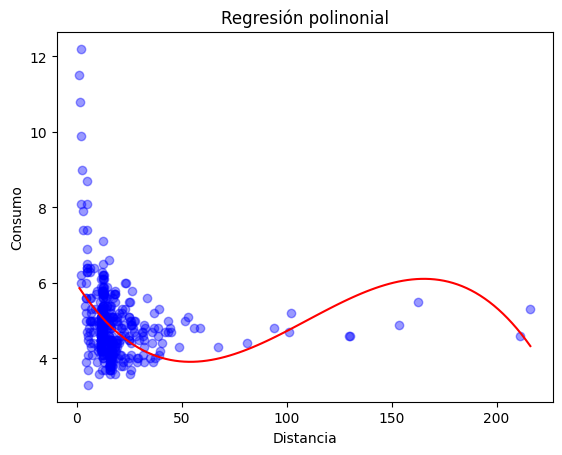

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

df = pd.read_csv("measurements.csv", encoding="latin-1", sep=",")

x = df["distance"].str.replace(',', '.').astype(float).values
y = df["consume"].str.replace(',', '.').astype(float).values

X = x.reshape(-1, 1)  # se cambia a matriz de una sola columna sino sale error

poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X)

modelo = LinearRegression()
modelo.fit(X_poly, y)

# predice los valores según el modelo de regresión polinomial
x_linea = np.linspace(X.min(), X.max(), 100).reshape(-1, 1) # hago la linea con los valores min. y max. de X
y_linea = modelo.predict(poly.transform(x_linea))

plt.scatter(X, y, color='blue', alpha=0.4)
plt.plot(x_linea, y_linea, color='red')
plt.title("Regresión polinonial")
plt.xlabel("Distancia")
plt.ylabel("Consumo")
plt.show()

5 ptos Ajuste regresiones polinomiales de diferentes grados.

5 ptos Grafique los modelos resultantes, ¿Qué observa en el error cuadrático medio y en la forma de las
predicciones a medida que aumenta el grado del polinomio?

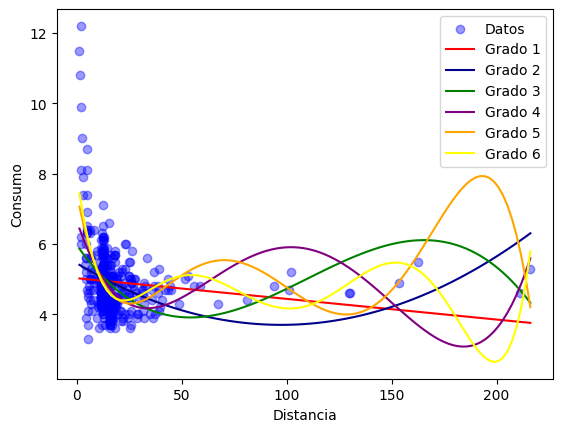

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import random

df = pd.read_csv("measurements.csv", encoding="latin-1", sep=",")

x = df["distance"].str.replace(',', '.').astype(float).values
y = df["consume"].str.replace(',', '.').astype(float).values

X = x.reshape(-1, 1)  # se cambia a matriz de una sola columna sino sale error

def calcular_polinomial(grado, x, y):
    
    poly = PolynomialFeatures(grado)
    X_poly = poly.fit_transform(x)

    modelo = LinearRegression()
    modelo.fit(X_poly, y)

    # predice los valores según el modelo de regresión polinomial
    x_linea = np.linspace(x.min(), x.max(), 100).reshape(-1, 1) # hago la linea con los valores min. y max. de X
    y_linea = modelo.predict(poly.transform(x_linea))
    return x_linea, y_linea

polinomio = {}
for i in range(1, 14):
    polinomio[i] = calcular_polinomial(i, X, y)
    
plt.scatter(X, y, color='blue', alpha=0.4)
colores = ['red', 'darkblue', 'green', 'purple', 'orange', 'yellow']

# colores = ['red', 'darkblue', 'green', 'purple', 'orange', 'yellow', 'black', 'pink', 'brown', 'gray', 'cyan', 'magenta', 'olive']

for i in range(1, 7):
    plt.plot(polinomio[i][0], polinomio[i][1], color=colores[i-1])

plt.xlabel("Distancia")
plt.ylabel("Consumo")
plt.legend(["Datos", "Grado 1", "Grado 2", "Grado 3", "Grado 4","Grado 5", "Grado 6"])
# plt.legend(["Datos", "Grado 1", "Grado 2", "Grado 3", "Grado 4","Grado 5", "Grado 6",  "Grado 7", "Grado 8", "Grado 9", "Grado 10", "Grado 11", "Grado 12", "Grado 13"])
plt.show()


**Respuesta:** Observamos que a mayor grado la curva se asemeja a una onda, lo que fluctua entre altos y bajos. Creemos que es el grado 6 el que más se acomoda a la realidad de los datos sin tanto ruido (color amarillo). Pero probamos otros grados que se vió como Overfitting. 

El grado 1, es la misma línea de la regresión lineal como el ejemplo anterior con nuestra clase creada, seríaun Underfitting. 

En conclusión el Good fit = grado 6 dado que tiene menor distancia del dato a la linea, mínima de errores cuadráticos, sólo se vé por inspección gráfica. 

### 2.3 Regresión con Penalización (bonus 10 puntos)

2.5 ptos Separe la base de datos en una para ajustar el modelo y otra para testearlo (80%-20%).

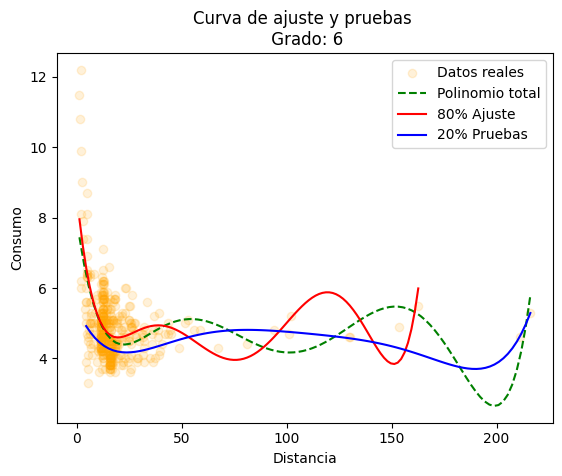

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge

df = pd.read_csv("measurements.csv", encoding="latin-1", sep=",")
x = df["distance"].str.replace(',', '.').astype(float).values
y = df["consume"].str.replace(',', '.').astype(float).values
X = x.reshape(-1, 1)  # se cambia a matriz de una sola columna sino sale error

tamaño_80 = int(len(x)*0.8)

x_ajuste = x[:tamaño_80]
y_ajuste = y[:tamaño_80]

x_prueba = x[tamaño_80:]
y_prueba = y[tamaño_80:]

X_A = x_ajuste.reshape(-1, 1)
X_T = x_prueba.reshape(-1, 1)

def calcular_polinomial(grado, x, y):
    
    poly = PolynomialFeatures(grado)
    X_poly = poly.fit_transform(x)

    modelo = LinearRegression()
    modelo.fit(X_poly, y)

    # predice los valores según el modelo de regresión polinomial
    x_linea = np.linspace(x.min(), x.max(), 100).reshape(-1, 1) # hago la linea con los valores min. y max. de X
    y_linea = modelo.predict(poly.transform(x_linea))
    return x_linea, y_linea

grade = 6
polinomio_ajuste = calcular_polinomial(grade, X_A, y_ajuste)
polinomio_test = calcular_polinomial(grade, X_T, y_prueba)
polinomio_total = calcular_polinomial(grade, X, y)

plt.scatter(X, y, color='orange', alpha=0.15)
plt.plot(polinomio_total[0], polinomio_total[1], color='green', ls="--")
plt.plot(polinomio_ajuste[0], polinomio_ajuste[1], color='red')
plt.plot(polinomio_test[0], polinomio_test[1], color='blue')

plt.xlabel("Distancia")
plt.ylabel("Consumo")
plt.legend(["Datos reales","Polinomio total", "80% Ajuste", "20% Pruebas"])
plt.title("Curva de ajuste y pruebas \n Grado: " + str(grade))
plt.show()

